# **Breast Cancer Prognosis Prediction Project**

---

## **Introduction**

This project is part of the **Digital Egypt Pioneers Initiative (DEPI)**, a scholarship provided by the Ministry of Information Technology and Communication. Under the guidance of our instructor, **Ahmed Moustafa**, our team—**Ahmed Elsayed**, **Ammar Osama**, **Moustafa Alaa**, and **Mahmoud Mohamed Helmy**—aims to develop a comprehensive analysis and prediction model for **breast cancer prognosis**.

---

### **Objective**

The primary objective of this project is to utilize data science methodologies, including **Exploratory Data Analysis (EDA)** and **Machine Learning (ML)**, to predict patient outcomes based on clinical features. By analyzing the dataset, we aim to uncover critical factors influencing prognosis and survival, and then develop a predictive model to forecast survival chances.

### **Dataset**

#### Features Description

The dataset used for breast cancer prognosis prediction contains several features that will be explored to assess their impact on patient outcomes:

1. **Age**  
   - **Description**: The age of the patient in years.  

2. **Race**  
   - **Description**: Ethnicity of the patient (e.g., White, Black, Asian).  

3. **Marital Status**  
   - **Description**: Marital status of the patient (e.g., Married, Divorced).  

4. **T Stage**  
   - **Description**: Tumor stage (e.g., T1, T2), indicating the size and extent of the primary tumor.  

5. **N Stage**  
   - **Description**: Node stage (e.g., N1, N2), reflecting the extent of lymph node involvement.  

6. **6th Stage**  
   - **Description**: Breast cancer stage classification based on the 6th edition TNM staging system (e.g., IIA, IIIA).  

7. **Differentiation**  
   - **Description**: Describes how much tumor cells resemble normal cells (e.g., Poorly differentiated, Moderately differentiated).  

8. **Grade**  
   - **Description**: A numerical value (e.g., 1-3) indicating tumor aggressiveness.  

9. **A Stage**  
   - **Description**: Additional stage data related to the spread of cancer in the body.  

10. **Tumor Size**  
    - **Description**: Size of the tumor in millimeters.  

11. **Estrogen Status**  
    - **Description**: Indicates if the tumor is estrogen-receptor-positive or negative (ER status).  

12. **Progesterone Status**  
    - **Description**: Indicates if the tumor is progesterone-receptor-positive or negative (PR status).  

13. **Regional Nodes Examined**  
    - **Description**: Number of regional lymph nodes examined during surgery.  

14. **Regional Node Positive**  
    - **Description**: Number of lymph nodes with cancer present.  

15. **Survival Months**  
    - **Description**: Number of months the patient has survived since diagnosis.  

16. **Status**  
    - **Description**: The patient's current status (Alive or Dead).  

---

### **Project Scope**

1. **Exploratory Data Analysis (EDA)**:  
   - We will begin by understanding the dataset, visualizing the distributions, and analyzing the relationships between variables.
   - Statistical analysis will help identify key factors impacting breast cancer prognosis.

2. **Machine Learning (ML)**:  
   - After conducting EDA, we will develop machine learning models to predict patient survival and outcomes.
   - We will explore multiple classification algorithms, evaluate model performance, and fine-tune the models to improve prediction accuracy.

---

This project aims to demonstrate the practical application of predictive analytics in healthcare. By leveraging historical patient data, we hope to contribute to the early detection of high-risk patients and potentially assist in optimizing treatment strategies.

---

**Let’s begin our analysis!**

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.subplots as sp


c:\Users\Ahmed Elsayed\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [27]:
df = pd.read_csv('Breast_Cancer.csv')

## Explore the Data

In [28]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [30]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

> NO missing values

> # **Exploratory Data Analysis(EDA)**

## Splitting Data by Status (Alive/Dead)

In [31]:
alive = df[df["Status"] == "Alive"].reset_index().drop(columns=["index"])
dead = df[df["Status"] == "Dead"].reset_index().drop(columns=["index"])


### **Creating Distribution Histograms**

#### Age Distribution by Status

In [32]:
figh_1 = px.histogram(df, x="Age", color='Status', barmode='group',
                      title="Distribution of Age by Status", histfunc='avg')
figh_1.update_layout(yaxis_title='Average Age')
figh_1.show()


#### Race Distribution by Status

In [33]:
figh_2 = px.histogram(df, x="Race", color='Status', barmode='group',
                      title="Distribution of Race by Status", histfunc='avg')
figh_2.update_layout(yaxis_title='Average Race')
figh_2.show()


#### Marital Status Distribution by Status

In [34]:
figh_3 = px.histogram(df, x="Marital Status", color='Status', barmode='group',
                      title="Distribution of Marital Status by Status", histfunc='avg')
figh_3.update_layout(yaxis_title='Average Marital Status')
figh_3.show()


#### T Stage Distribution by Status

In [35]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces from all column names

figh_4 = px.histogram(df, x="T Stage", color='Status', barmode='group',
                      title="Distribution of T Stage by Status", histfunc='avg')
figh_4.update_layout(yaxis_title='Average T Stage')
figh_4.show()


#### N Stage Distribution by Status

In [36]:
figh_5 = px.histogram(df, x="N Stage", color='Status', barmode='group',
                      title="Distribution of N Stage by Status", histfunc='avg')
figh_5.update_layout(yaxis_title='Average N Stage')
figh_5.show()


#### 6th Stage Distribution by Status

In [37]:
figh_6 = px.histogram(df, x="6th Stage", color='Status', barmode='group',
                      title="Distribution of 6th Stage by Status", histfunc='avg')
figh_6.update_layout(yaxis_title='Average 6th Stage')
figh_6.show()


#### Differentiation Distribution by Status

In [38]:
figh_7 = px.histogram(df, x="differentiate", color='Status', barmode='group',
                      title="Distribution of Differentiation by Status", histfunc='avg')
figh_7.update_layout(yaxis_title='Average Differentiation')
figh_7.show()


#### A Stage Distribution by Status

In [39]:
figh_8 = px.histogram(df, x="A Stage", color='Status', barmode='group',
                      title="Distribution of A Stage by Status", histfunc='avg')
figh_8.update_layout(yaxis_title='Average A Stage')
figh_8.show()


### **Comparing Alive/Dead Status with Pie Charts**

#### Pie Charts for Race

In [40]:
fig_r1 = px.pie(df[df["Status"] == "Alive"], names='Race')
fig_r2 = px.pie(df[df["Status"] == "Dead"], names='Race')

Race_fig = make_subplots(rows=1, cols=2, subplot_titles=("Race Distribution (Alive)", "Race Distribution (Dead)"),
                         specs=[[{'type': 'pie'}, {'type': 'pie'}]])

Race_fig.add_trace(fig_r1.data[0], row=1, col=1)
Race_fig.add_trace(fig_r2.data[0], row=1, col=2)
Race_fig.show()


#### Pie Charts for Marital Status

In [41]:
fig_M1 = px.pie(df[df["Status"] == "Alive"], names='Marital Status')
fig_M2 = px.pie(df[df["Status"] == "Dead"], names='Marital Status')

Marital_fig = make_subplots(rows=1, cols=2, subplot_titles=("Marital Status (Alive)", "Marital Status (Dead)"),
                            specs=[[{'type': 'pie'}, {'type': 'pie'}]])

Marital_fig.add_trace(fig_M1.data[0], row=1, col=1)
Marital_fig.add_trace(fig_M2.data[0], row=1, col=2)
Marital_fig.show()


#### Pie Charts for T Stage

In [42]:
fig_t1 = px.pie(df[df["Status"] == "Alive"], names='T Stage')
fig_t2 = px.pie(df[df["Status"] == "Dead"], names='T Stage')

T_Stage_fig = make_subplots(rows=1, cols=2, subplot_titles=("T Stage (Alive)", "T Stage (Dead)"),
                            specs=[[{'type': 'pie'}, {'type': 'pie'}]])

T_Stage_fig.add_trace(fig_t1.data[0], row=1, col=1)
T_Stage_fig.add_trace(fig_t2.data[0], row=1, col=2)
T_Stage_fig.show()


### **Analyzing Continuous Variables**

#### Tumor Size

In [43]:
fig_Tm = px.box(df, x='Status', y='Tumor Size', color='Status',
                color_discrete_sequence=['blue', 'red'], category_orders={'Status': ["Alive", "Dead"]})
fig_Tm.show()

#### Regional Node Examined

In [44]:
fig_RNE = px.box(df, x='Status', y='Regional Node Examined', color='Status',
                 color_discrete_sequence=['blue', 'red'], category_orders={'Status': ["Alive", "Dead"]})
fig_RNE.show()


### Examine feature Correlations

#### Age vs Tumor Size

In [45]:
fig_at = px.scatter(df, x='Age', y='Tumor Size', color='Status',
                    color_discrete_map={'Alive': 'blue', 'Dead': 'red'},
                    title="Age vs Tumor Size by Status")
fig_at.show()


#### Age vs Survival Months

In [46]:
fig_sm = px.scatter(df, x='Age', y='Survival Months', color='Status',
                    color_discrete_map={'Alive': 'blue', 'Dead': 'red'},
                    title="Age vs Survival Months by Status")
fig_sm.show()


#### Correlation Matrix

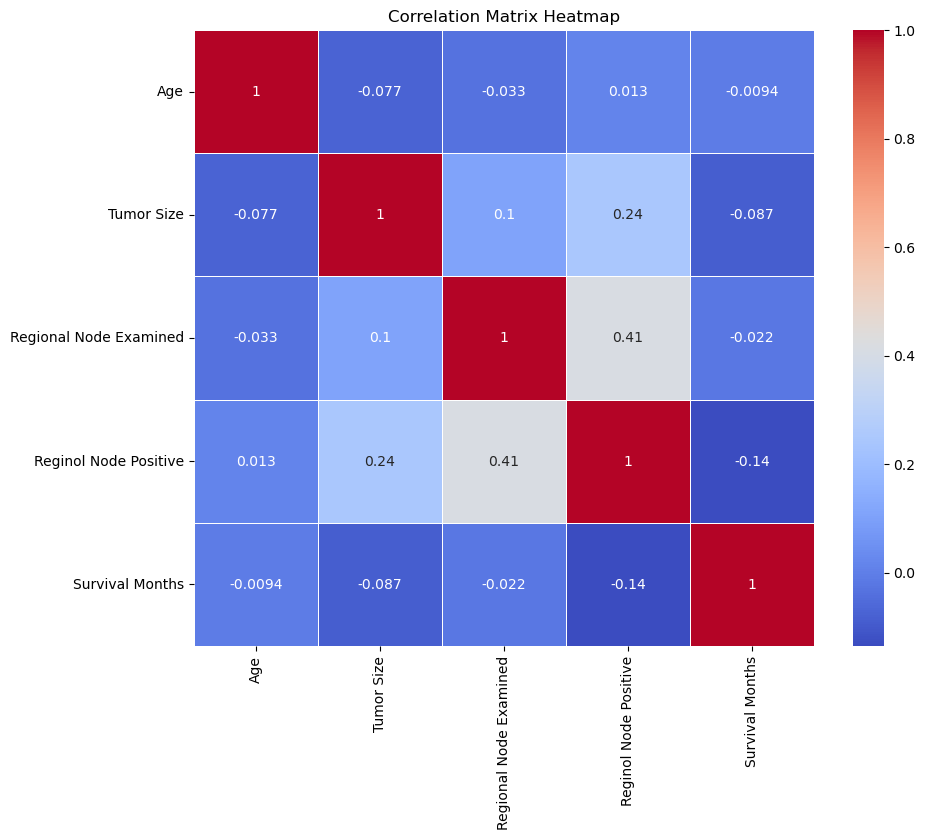

In [47]:
# Select only the numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [48]:
# 6. Key Findings Summary
print("Key Findings:")
print(f"1. Average age of patients: {df['Age'].mean():.2f} years")
print(f"2. Overall survival rate: {(df['Status'] == 'Alive').mean()*100:.2f}%")
print(f"3. Median survival time: {df['Survival Months'].median()} months")
print(f"4. Most common cancer stage: {df['6th Stage'].mode()[0]}")
print(f"5. Correlation between tumor size and survival months: {df['Tumor Size'].corr(df['Survival Months']):.2f}")

Key Findings:
1. Average age of patients: 53.97 years
2. Overall survival rate: 84.69%
3. Median survival time: 73.0 months
4. Most common cancer stage: IIA
5. Correlation between tumor size and survival months: -0.09


## Based on our dataset, we can answer several key questions. Let's explore each one systematically.

## Question 1: What factors are most strongly associated with survival?

In [49]:
# Survival months distribution by stage
fig = px.box(df, x="6th Stage", y="Survival Months", color="Status",
             title="Survival Months by Cancer Stage and Status")
fig.show()

# Create survival rate by stage
stage_survival = df.groupby('6th Stage').agg({
    'Status': lambda x: (x == 'Alive').mean() * 100
}).reset_index()

fig = px.bar(stage_survival, x='6th Stage', y='Status',
             title="Survival Rate by Cancer Stage",
             labels={'Status': 'Survival Rate (%)'})
fig.show()


## Question 2: Is there a relationship between age and cancer characteristics?


In [51]:
fig = px.scatter(df, x="Age", y="Tumor Size", 
                 color="6th Stage", size="Reginol Node Positive",
                 hover_data=['Status'],
                 title="Age vs Tumor Size by Stage and Nodal Involvement")
fig.show()

# Age distribution by stage
fig = px.violin(df, x="6th Stage", y="Age", box=True, points="all",
                title="Age Distribution by Cancer Stage")
fig.show()

## Question 3: How do hormone receptor statuses affect outcomes?


In [52]:
# Create combined hormone status
df['Hormone_Status'] = df['Estrogen Status'] + '_' + df['Progesterone Status']

# Survival months by hormone status
fig = px.box(df, x="Hormone_Status", y="Survival Months", color="Status",
             title="Survival Months by Hormone Receptor Status")
fig.show()

# Create a sunburst chart for hormone status, grade, and survival
fig = px.sunburst(df, path=['Hormone_Status', 'Grade', 'Status'],
                  title="Relationship between Hormone Status, Grade, and Survival")
fig.show()


## Question 4: What is the relationship between tumor size and nodal involvement?


In [53]:
# Scatter plot with trend line
fig = px.scatter(df, x="Tumor Size", y="Reginol Node Positive",
                 trendline="ols", color="T Stage",
                 title="Tumor Size vs Positive Nodes by T Stage")
fig.show()

# Box plot of positive nodes by T stage
fig = px.box(df, x="T Stage", y="Reginol Node Positive",
             title="Distribution of Positive Nodes by T Stage")
fig.show()


## Question 5: Are there racial disparities in diagnosis, treatment, or outcomes?


In [55]:
# Stage distribution by race
stage_race = pd.crosstab(df['Race'], df['6th Stage'], normalize='index') * 100
stage_race_long = stage_race.reset_index().melt(id_vars=['Race'], 
                                                var_name='Stage', 
                                                value_name='Percentage')

fig = px.bar(stage_race_long, x="Race", y="Percentage", color="Stage",
             title="Cancer Stage Distribution by Race")
fig.show()


In [54]:
# Survival months by race
fig = px.box(df, x="Race", y="Survival Months", color="Status",
             title="Survival Months by Race and Status")
fig.show()

# Average age at diagnosis by race
fig = px.violin(df, x="Race", y="Age", box=True,
                title="Age Distribution by Race")
fig.show()

Based on the visualizations:

1. Survival and Cancer Stage:
- There is a clear correlation between cancer stage and survival rates
- Stage IIA has the highest survival rate (approximately 80%)
- Survival rates progressively decrease with higher stages, with IIIC having the lowest survival rate (around 60%)
- For all stages, patients who survive typically have higher survival months compared to those who don't

2. Age and Cancer Characteristics:
- There appears to be no strong correlation between age and tumor size
- The age distribution is fairly similar across different cancer stages
- Most patients are between 40-70 years old, with the median age around 55-60
- There's a slight trend of IIIB stage being diagnosed in slightly older patients

3. Hormone Receptor Status:
- Patients with Positive/Positive hormone status (both Estrogen and Progesterone positive) tend to have better survival outcomes
- Negative/Negative hormone status appears to have the worst outcomes
- The sunburst chart shows that hormone status, grade, and survival are interconnected, with certain combinations having better outcomes

4. Tumor Size and Nodal Involvement:
- There's a positive correlation between tumor size and the number of positive lymph nodes
- As T stage increases (T1 to T4), the distribution of positive nodes shifts upward
- T1 tumors typically have fewer positive nodes, while T3 and T4 tumors are associated with more nodal involvement
- The relationship is not strictly linear, showing considerable variation

5. Racial Disparities:
- There are some differences in cancer stage distribution among racial groups
- Black patients appear to have a slightly higher proportion of more advanced stages (IIIB and IIIC) compared to White and Other racial categories
- The overall distribution pattern is similar across races, but with subtle variations that might be clinically significant

Additional General Observations:
- The dataset shows a comprehensive range of cancer characteristics
- There are complex interrelationships between various factors (stage, hormone status, age, etc.)
- Survival outcomes are influenced by multiple factors, not just a single characteristic

